# Face Detection with OpenCV

In [1]:
!pip install opencv-python

In [3]:
from cv2 import destroyAllWindows, imread, imshow, rectangle, waitKey, CascadeClassifier
from cv2.data import haarcascades

### 1st Image

In [4]:
pixels = imread("test1.jpg")

In [5]:
classifier = CascadeClassifier(haarcascades + "haarcascade_frontalface_default.xml")
classifier

<CascadeClassifier 0x7fc1c07ad9f0>

In [6]:
def detect_faces(scaleFactor = 1.1, minNeighbors = 3):
    bounding_boxes = classifier.detectMultiScale(pixels, scaleFactor, minNeighbors);
    for box in bounding_boxes:
        x, y, width, height = box
        x2, y2 = x + width, y + width
        rectangle(pixels, (x, y), (x2, y2), (0, 0, 255), 1)

    imshow("face detection", pixels)
    waitKey(0)
    destroyAllWindows()

In [7]:
detect_faces()

### 2nd Image

In [10]:
pixels = imread("test2.jpg")

In [11]:
detect_faces(1.05, 8)

# Face Detection with Deep Learning

In [6]:
!pip install mtcnn
!pip install tensorflow

     |████████████████████████████████| 195.7 MB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 8.3 MB/s eta 0:00:01
     |████████████████████████████████| 152 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 

In [24]:
from matplotlib import pyplot
from matplotlib.patches import Circle, Rectangle
from mtcnn import MTCNN

In [25]:
def draw_image_with_boxes(filename):
    data = pyplot.imread(filename)
    pyplot.imshow(data)
    
    ax = pyplot.gca()
    
    detector = MTCNN()
    faces = detector.detect_faces(data)
    
    for face in faces:
        x, y, width, height = face["box"]
        rect = Rectangle((x, y), width, height, fill=False, color="red")
        ax.add_patch(rect)
        
        for key, value in face['keypoints'].items():
            dot = Circle(value, radius=2, color="red")
            ax.add_patch(dot)
    
    pyplot.show()

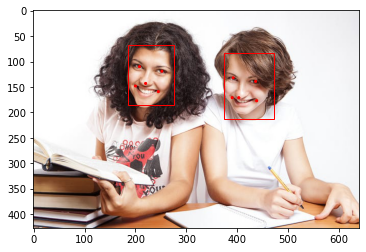

In [26]:
draw_image_with_boxes("test1.jpg")

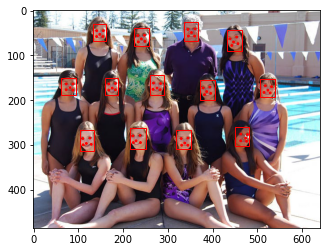

In [27]:
draw_image_with_boxes("test2.jpg")

### Extract Faces

In [30]:
def draw_faces(filename):
    data = pyplot.imread(filename)
    detector = MTCNN()
    faces = detector.detect_faces(data)
    
    for i in range(len(faces)):
        x1, y1, width, height = faces[i]["box"]
        x2, y2 = x1 + width, y1 + height
        
        pyplot.subplot(1, len(faces), i+1)
        pyplot.axis("off")
        pyplot.imshow(data[y1:y2, x1:x2])
        
    pyplot.show()

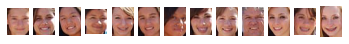

In [31]:
draw_faces("test2.jpg")